<a href="https://colab.research.google.com/github/omaimajameel11/HunarIntern_task04/blob/main/HunarInternTask4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 260s 443ms/step - accuracy: 0.6341 - loss: 0.6291 - val_accuracy: 0.7408 - val_loss: 0.5219
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 262s 449ms/step - accuracy: 0.7664 - loss: 0.4874 - val_accuracy: 0.7962 - val_loss: 0.4507
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 258s 442ms/step - accuracy: 0.8059 - loss: 0.4229 - val_accuracy: 0.7623 - val_loss: 0.4944


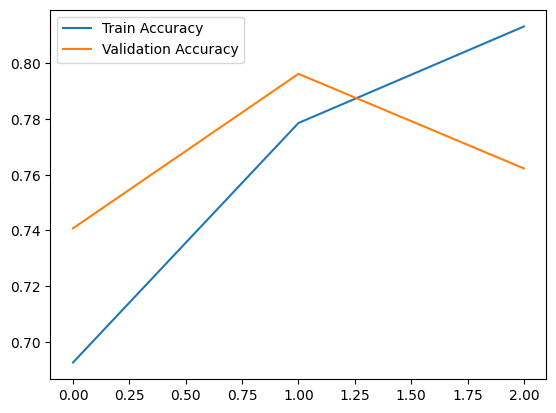

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Prediction: 🐶 Dog


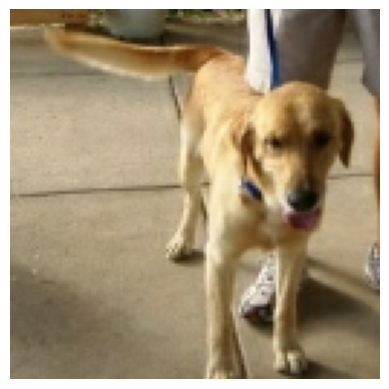

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load dataset from TFDS (no folders needed)
(train_ds, val_ds), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True,
)

# Preprocess (resize + normalize)
IMG_SIZE = 128  # smaller size → faster training

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

BATCH_SIZE = 32
train_ds = train_ds.map(preprocess).shuffle(500).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Build smaller CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),  # smaller dense layer
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train fewer epochs for speed
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

# Plot training curve
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

# Test on one validation image
for image, label in val_ds.take(1):
    pred = model.predict(image[:1])
    print("Prediction:", " Dog" if pred[0][0] > 0.5 else " Cat")
    plt.imshow(image[0])
    plt.axis("off")
    plt.show()
